In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import scipy.stats

# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, f1_score, precision_score, recall_score

### Read the data in

In [2]:
heart=pd.read_csv('heart.csv')

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# check number of class 1 (heart failure) and class 0(no-heart failure)
heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

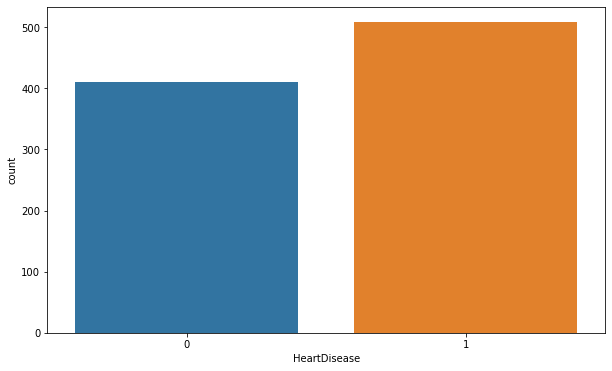

In [5]:
plt.figure(figsize= (10,6))
sns.countplot(data= heart, x='HeartDisease');

### Data cleaning

In [6]:
# dealing with null values
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No null values.

### Dealing with outliers

In [7]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

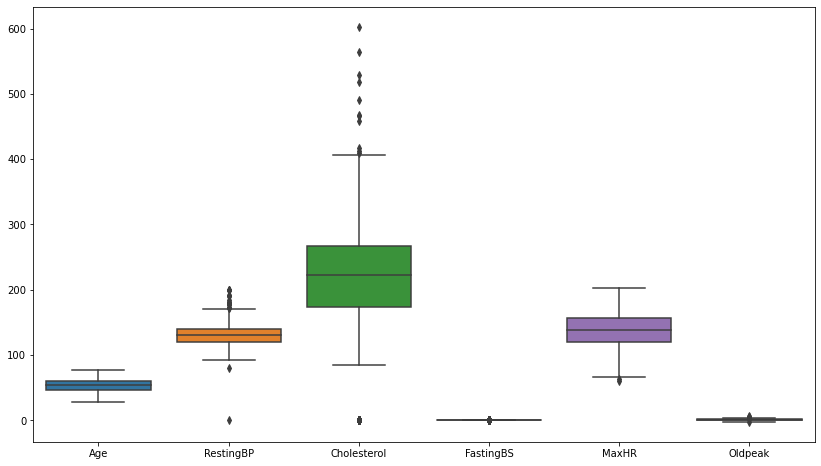

In [8]:
plt.figure(figsize= (14,8))
sns.boxplot(data= heart.drop('HeartDisease', axis= 1))

In [9]:
bool_mask= heart['Cholesterol'] < 400

heart_1= heart[bool_mask].reset_index(drop= True)

In [10]:
heart_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
heart_1.shape

(905, 12)

<AxesSubplot:>

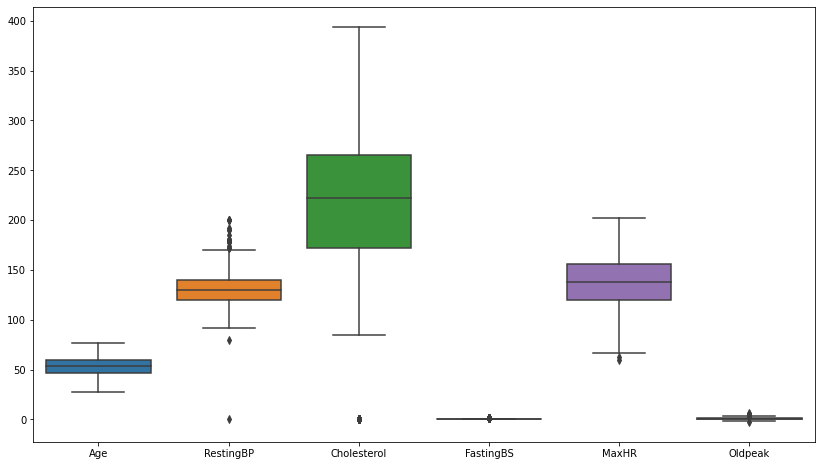

In [12]:
plt.figure(figsize= (14,8))
sns.boxplot(data= heart_1.drop('HeartDisease', axis= 1))

In [13]:
heart_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dealing with catagorical data /Encoding catagorical data

In [14]:
#select_catagorical data
heart_1.select_dtypes('object').head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [16]:
#get dummies for catagorical features
#pd.get_dummies(heart_1.select_dtypes('object'), drop_first= True)
heart_1= pd.get_dummies(heart_1, drop_first= True)  # we can call it on the df b/c it converts only catagorical values

heart_1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [ ]:
heart.shape

### Feature Selection

In [17]:
heart_1.drop('HeartDisease', axis= 1).corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.255306,-0.095452,0.199572,-0.388060,0.254467,0.068253,-0.221405,-0.019339,0.031907,-0.223652,0.137256,0.220373,0.191476,-0.263584
RestingBP,0.255306,1.000000,0.109189,0.072126,-0.114695,0.163789,0.003719,-0.043512,-0.042160,0.050040,-0.116888,0.090911,0.157330,0.100823,-0.097711
Cholesterol,-0.095452,0.109189,1.000000,-0.284771,0.250399,0.051363,-0.198948,0.170247,-0.009961,0.026953,-0.049807,-0.121561,-0.028468,-0.071385,0.117386
FastingBS,0.199572,0.072126,-0.284771,1.000000,-0.128820,0.053975,0.120168,-0.139514,-0.040431,0.027719,-0.096176,0.129703,0.057789,0.111761,-0.163555
MaxHR,-0.388060,-0.114695,0.250399,-0.128820,1.000000,-0.165214,-0.185914,0.257600,0.132755,0.100775,0.030494,-0.159110,-0.375528,-0.349631,0.384756
Oldpeak,0.254467,0.163789,0.051363,0.053975,-0.165214,1.000000,0.116756,-0.262011,-0.106220,0.032924,-0.109862,0.057408,0.411280,0.282133,-0.451558
Sex_M,0.068253,0.003719,-0.198948,0.120168,-0.185914,0.116756,1.000000,-0.161541,-0.062054,-0.005508,-0.023351,0.061511,0.189934,0.118147,-0.151535
ChestPainType_ATA,-0.221405,-0.043512,0.170247,-0.139514,0.257600,-0.262011,-0.161541,1.000000,-0.258008,-0.112097,0.108078,-0.048391,-0.302575,-0.302560,0.355221
ChestPainType_NAP,-0.019339,-0.042160,-0.009961,-0.040431,0.132755,-0.106220,-0.062054,-0.258008,1.000000,-0.123254,0.010872,-0.042457,-0.163288,-0.072802,0.093356
ChestPainType_TA,0.031907,0.050040,0.026953,0.027719,0.100775,0.032924,-0.005508,-0.112097,-0.123254,1.000000,-0.057505,-0.013257,-0.129653,-0.009294,0.000763


<AxesSubplot:>

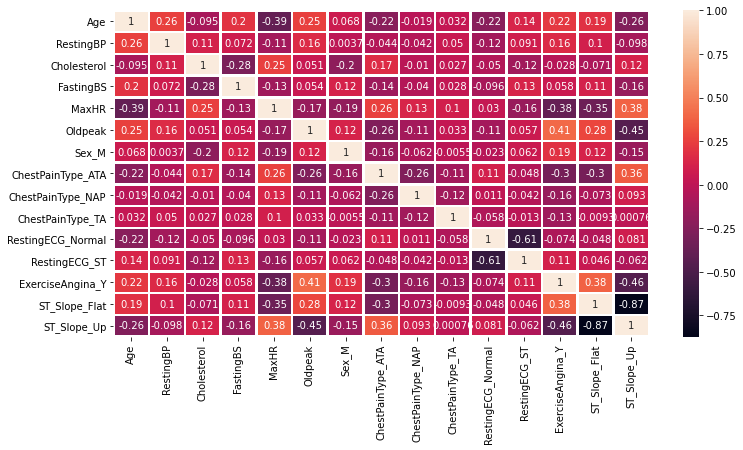

In [19]:
# checking colinearity
plt.figure(figsize= (12,6))
sns.heatmap(heart_1.drop('HeartDisease', axis= 1).corr(), linewidths=1.5, annot= True)

*There is no significant correlation between features*

### Select X_features and y_label

In [20]:
X= heart_1.drop('HeartDisease', axis= 1)

y= heart_1['HeartDisease']

### Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [23]:
scaler= StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
scaler.mean_

array([5.35649171e+01, 1.33019337e+02, 1.95719613e+02, 2.25138122e-01,
       1.36667127e+02, 9.05386740e-01, 7.84530387e-01, 1.94751381e-01,
       2.12707182e-01, 4.97237569e-02, 5.95303867e-01, 1.98895028e-01,
       4.18508287e-01, 5.09668508e-01, 4.24033149e-01])

In [26]:
scaler.var_

array([8.67374985e+01, 3.56228908e+02, 1.10713565e+04, 1.74450948e-01,
       6.21067372e+02, 1.17249861e+00, 1.69042459e-01, 1.56823281e-01,
       1.67462837e-01, 4.72513049e-02, 2.40917173e-01, 1.59335796e-01,
       2.43359101e-01, 2.49906520e-01, 2.44229038e-01])

In [27]:
# scale x_features
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

### Train the model

In [28]:
#train the model on the following classifiers
classifiers = [ RandomForestClassifier(),
               LogisticRegression(),
               DecisionTreeClassifier(),
               KNeighborsClassifier(),
               SVC()]

pipe_dict = {0: 'RandomForest', 1: 'LogisticRegression', 2: 'DecisionTree',3: 'KNeighbors', 4:'SVC'}

for i, classsifire in enumerate (classifiers):
    classsifire.fit(scaled_X_train, y_train)
    y_pred= classsifire.predict(scaled_X_test)
    accu= accuracy_score(y_test, y_pred)
    print(f'{pipe_dict[i]}: {accu}')
    

RandomForest: 0.8784530386740331
LogisticRegression: 0.850828729281768
DecisionTree: 0.7679558011049724
KNeighbors: 0.8784530386740331
SVC: 0.9005524861878453


 ###  Model Evaluation

In [29]:

# creating lists of varios scores
precision =[]
recall =[]
#f1_score = []
accuracy = []

for classifier in classifiers:
    y_pred = classifier.predict(scaled_X_test)
    prec = precision_score(y_test, y_pred)
    recal = recall_score(y_test, y_pred)
    #f1_s = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test,y_pred)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    #f1_score.append(f1_s)
    accuracy.append(acc)

In [30]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
#'F1score':f1_score,
'Accuracy': accuracy}

# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =[ 'RandomForest', 'LogisticRegression', 'DecisionTree','KNeighbors', 'SVC'])

Results

,Precision,Recall,Accuracy
RandomForest,0.925532,0.852941,0.878453
LogisticRegression,0.871287,0.862745,0.850829
DecisionTree,0.833333,0.735294,0.767956
KNeighbors,0.916667,0.862745,0.878453
SVC,0.920000,0.901961,0.900552


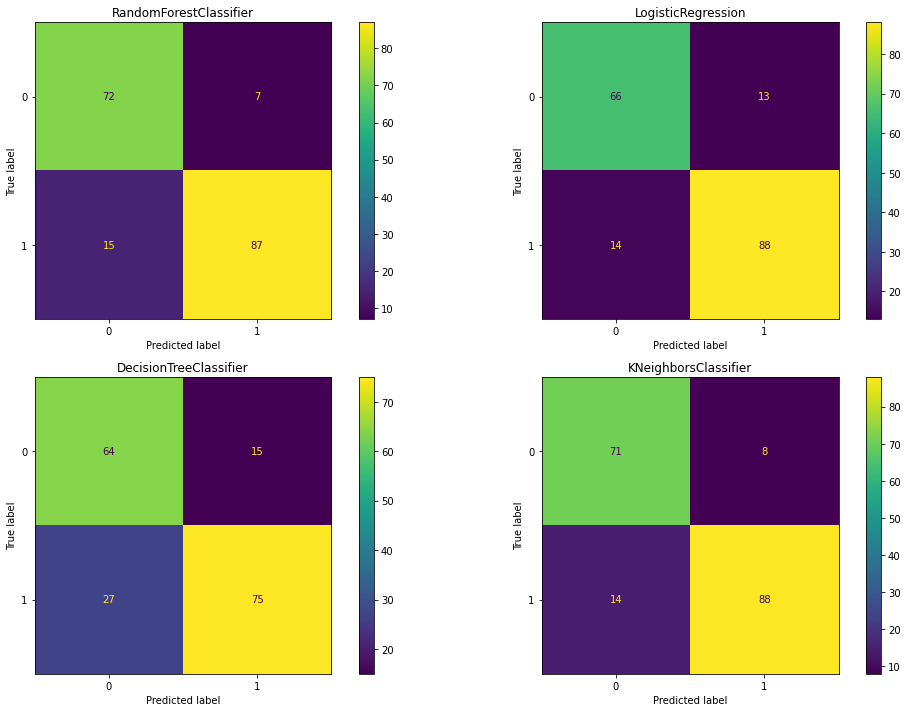

In [31]:
# plot results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls, 
                          scaled_X_test, 
                          y_test, 
                          ax=ax,    
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

### Grid search /Hyperparametrs tunning for the top 3 models for SVM, KNeighbors, Random forest

 ### KNN

In [32]:
param_grid= {'n_neighbors': [2,5,10,15,20, 25, 30,40]}

knn=KNeighborsClassifier()

gscv= GridSearchCV(knn, param_grid= param_grid) 

gscv.fit(scaled_X_train, y_train)

gscv.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [33]:
model= KNeighborsClassifier(n_neighbors=25)

model.fit(scaled_X_train, y_train)

model.predict(scaled_X_test)

accu= accuracy_score(y_test, y_pred)
accu

0.9005524861878453

<Figure size 2100x1200 with 0 Axes>

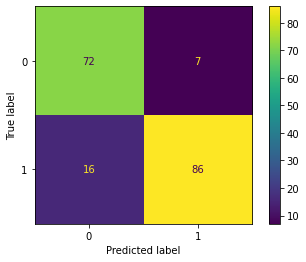

In [34]:
plt.figure(figsize=(14,8), dpi= 150)
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test);

### Random Forest

In [35]:
param_grid= {'n_estimators': [10,20,30,40,50, 120, 200,300]}

rfc= RandomForestClassifier()

gscv= GridSearchCV(rfc, param_grid= param_grid) 

gscv.fit(scaled_X_train, y_train)

gscv.best_estimator_

RandomForestClassifier(n_estimators=50)

In [36]:
model= RandomForestClassifier(n_estimators=120)

model.fit(scaled_X_train, y_train)

model.predict(scaled_X_test)

accu= accuracy_score(y_test, y_pred)
accu

0.9005524861878453

<Figure size 2100x1200 with 0 Axes>

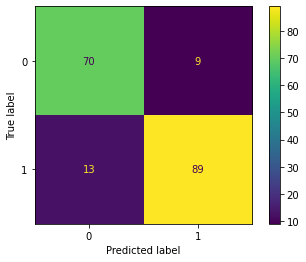

In [37]:
plt.figure(figsize=(14,8), dpi= 150)
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test);

### SVM

In [38]:
param_grid= {
           'C': [1,5, 10, 15, 20, 25], 
             'kernel': ('linear', 'rbf')
            }

svc= SVC()

gscv= GridSearchCV(svc, param_grid= param_grid) 

gscv.fit(scaled_X_train, y_train)

gscv.best_estimator_

SVC(C=10, kernel='linear')

In [39]:
model= SVC(C=10, kernel='linear')

model.fit(scaled_X_train, y_train)

model.predict(scaled_X_test)

accu= accuracy_score(y_test, y_pred)
accu

0.9005524861878453

<Figure size 2100x1200 with 0 Axes>

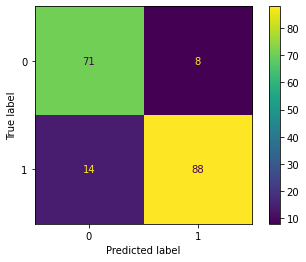

In [40]:
plt.figure(figsize=(14,8), dpi= 150)
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test);